229.87921393756747
64.13393753507818


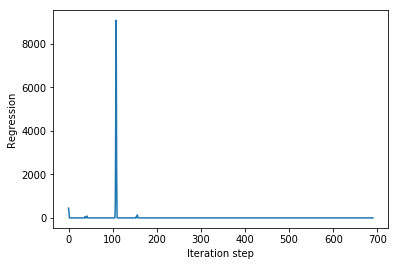

In [5]:
# newton raphson method of optimization implementation
import numpy as np
import matplotlib.pyplot as plt

class newtonraphson:
    def __init__(self,w0,t0,error,n):
        self.w0 = w0 
        self.t0 = t0     
        self.error = error
        self.n = n
    def noise(self,mean,variance):
        return(np.random.normal(mean,variance))
    def function(self,w,t):
        return(np.array([t-(18+11*w-0.12*w**2),t-(0.7*w+185)]))
    def derivative(self,f,w,t):
        return(np.array([[1+self.noise(100,1.5),-11+0.24*w+self.noise(100,1.5)],[1+self.noise(100,1.5),-0.7+self.noise(100,1.5)]]))
    def newtonraphson(self):
        w0 = self.w0
        t0 = self.t0
        reg = []
        for i in range(self.n):
            f = self.function(w0,t0)
            df = self.derivative(f,w0,t0)
            del_t,del_w = np.linalg.solve(df,-f)
            reg.append(del_t**2+del_w**2)
            if(abs(del_t)<self.error and abs(del_w)<self.error):
                print(del_t+t0)
                print(del_w+w0)
                break
            else:
                w0 = w0+del_w
                t0 = t0+del_t
            if(i==self.n-1 and (abs(del_t)>self.error or abs(del_w)>self.error)):
                print("Not coverging")
        plt.plot(reg)
        plt.ylabel('Regression')
        plt.xlabel('Iteration step')
        plt.savefig('Regression_graph.png')
        plt.show()
        
        File_object = open(r"Output.txt","w+")
        L = ['The optimal is obtained for the following values of T and W','\n','T = ', str(del_t+t0), '\n', 'W = ', str(del_w+w0),'\n']
        File_object.writelines(L)
        File_object.close()
if __name__=='__main__':
    nr = newtonraphson(60,200,0.0001,1000)
    nr.newtonraphson()